# Homework Assignment #3

In [97]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
data_path = os.path.join("data", "caseStudyCleaned.csv")

if not os.path.exists(data_path):
    print("Download data first!")

In [101]:
df = pd.read_csv(data_path)

### 1. Is Wall’s belief about the dependence of churn rates on customer age supported by the data? To get some intuition, try visualizing this dependence (Hint: no need to run any statistical tests).

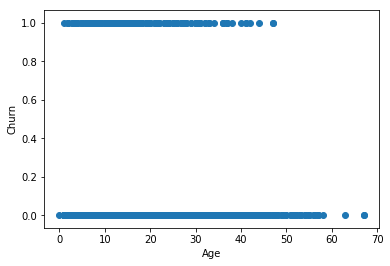

In [103]:
plt.scatter(df['CustomerAgeinmonths'],df['Churn1Yes0No'])
plt.xlabel("Age")
plt.ylabel('Churn')
plt.savefig("1")

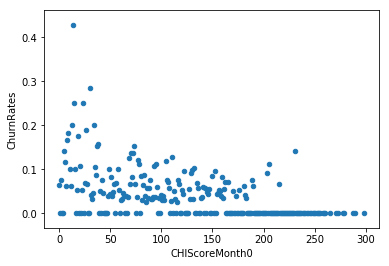

In [105]:
df_t = df.loc[:,['CHIScoreMonth0', 'Churn1Yes0No']]
df_t = df_t.groupby(['CHIScoreMonth0']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="CHIScoreMonth0", y="ChurnRates");

### 2. To start, run a single regression model that best predicts the probability that a customer leaves.
#### a. What is the predicted probability that Customer 672 will leave between December 2011 and February 2012? Is that high or low? Did that customer actually leave?
#### b. What about Customers 354 and 5,203?

In [106]:
from sklearn.linear_model import LogisticRegression

myLogMod = LogisticRegression(solver = 'lbfgs').fit(np.array([df.CHIScoreMonth0]).T, np.array([df.Churn1Yes0No]).T)
b_1 = myLogMod.coef_
b_0 = myLogMod.intercept_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
print(b_0, b_1)

[-2.46064255] [[-0.00615342]]


$$ Churn1Yes0No = -2.46064255 - 0.00615342 * CHIScoreMonth0 $$
$$ P(Churn1Yes0No) = \frac{1}{1 + e^{-(-2.46064255 - 0.00615342 * CHIScoreMonth0)}} $$

In [108]:
CHIScore = df.CHIScoreMonth0[df.ID == 672]
Prob_Churn = 1 / (1 + np.exp(- (-2.46064255 -0.00615342 * CHIScore)))
print("For Customer 672: ", Prob_Churn)
df[df.ID == 672]

For Customer 672:  671    0.033203
Name: CHIScoreMonth0, dtype: float64


,ID,CustomerAgeinmonths,Churn1Yes0No,CHIScoreMonth0,CHIScore01,SupportCasesMonth0,SupportCases01,SPMonth0,SP01,Logins01,BlogArticles01,Views01,DaysSinceLastLogin01
671,672,16.0,0.0,148.0,1.0,0.0,0.0,0.0,0.0,17.0,1.0,85.0,2.0


In [109]:
CHIScore = df.CHIScoreMonth0[df.ID == 354]
Prob_Churn = 1 / (1 + np.exp(- (-2.46064255 -0.00615342 * CHIScore)))
print("For Customer 354: ", Prob_Churn)
df[df.ID == 354]

For Customer 354:  353    0.035027
Name: CHIScoreMonth0, dtype: float64


,ID,CustomerAgeinmonths,Churn1Yes0No,CHIScoreMonth0,CHIScore01,SupportCasesMonth0,SupportCases01,SPMonth0,SP01,Logins01,BlogArticles01,Views01,DaysSinceLastLogin01
353,354,13.0,0.0,139.0,29.0,0.0,0.0,0.0,0.0,4.0,1.0,244.0,1.0


In [110]:
CHIScore = df.CHIScoreMonth0[df.ID == 5203]
Prob_Churn = 1 / (1 + np.exp(- (-2.46064255 -0.00615342 * CHIScore)))
print("For Customer 5203: ", Prob_Churn)
df[df.ID == 5203]

For Customer 5203:  5202    0.063666
Name: CHIScoreMonth0, dtype: float64


,ID,CustomerAgeinmonths,Churn1Yes0No,CHIScoreMonth0,CHIScore01,SupportCasesMonth0,SupportCases01,SPMonth0,SP01,Logins01,BlogArticles01,Views01,DaysSinceLastLogin01
5202,5203,4.0,0.0,37.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0


|   ID   | CHI Score | Probability | Leave |
|--------|-----------|-------------|-------|
|672     |148        | 3.3%        | NO    |
|354     |139        | 3.5%        | NO    |
|5203    |37         | 6.36%       | NO    |

### 3. How sensible is the approach with a single model? Can you suggest a better approach?
#### a. Provide updated estimates of probabilities that Customers 672, 354, and 5,203 will leave.
#### b. What factors contribute the most to the predicted probabilities that these customers will leave?

## ## Ridge Regression

In [111]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [245]:
df_x = df[['CustomerAgeinmonths','CHIScoreMonth0','CHIScore01','SupportCasesMonth0','SupportCases01','SPMonth0','SP01',
    'Logins01','BlogArticles01','Views01','DaysSinceLastLogin01']]
df_y = df['Churn1Yes0No']

In [259]:
X_train, X_test , y_train, y_test = \
    train_test_split(np.array(df_x), np.array(df_y), test_size = 0.5, random_state = 11)

In [260]:
myLinReg = LinearRegression()
x = myLinReg.fit(X_train, y_train)
linRegPreds = x.predict(X_test)
print("MSE: " + str(mean_squared_error(y_test,linRegPreds)))

MSE: 0.04799085045280179


In [261]:
myRidge = Ridge(normalize = True)

myRidge.set_params(alpha = 0)
myRidge.fit(X_train, y_train)
ridgeRegPreds = myRidge.predict(X_test)
print("MSE: " + str(mean_squared_error( y_test, ridgeRegPreds)))

MSE: 0.04799085045280179


In [262]:
# Create a vector of alphas from 5 billion to 0.005
alphas = 10**np.linspace(10, -4, 500)*0.5

In [263]:
myRidge = Ridge(normalize = True)
coefs = []

for a in alphas:
    myRidge.set_params(alpha = a)
    myRidge.fit(X_train, y_train)

    for i in range(X_train.shape[1]):
        coefs.append([a, "b_" + str(i + 1), myRidge.coef_[i]])

In [264]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train) 
ridgecv.alpha_

0.48187893319205344

In [265]:
bestRidge = Ridge(alpha = ridgecv.alpha_, normalize = True)
bestRidge.fit(X_test, y_test)             # Fit a ridge regression on the training data
pred4 = bestRidge.predict(X_train)           # Use this model to predict the test data
print(mean_squared_error(y_train, pred4)) 

0.048059354551371086


## LASSO Regression

In [266]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [267]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)

    for i in range(X_train.shape[1]):
        coefs.append([a, "b_" + str(i + 1), lasso.coef_[i]])

In [274]:
myCoefs = pd.DataFrame(coefs, columns=['alpha', 'beta', 'beta_val'])
myCoefs.iloc[5450:]

,alpha,beta,beta_val
5450,0.000065,b_6,-0.005218
5451,0.000065,b_7,0.000000
5452,0.000065,b_8,0.000000
5453,0.000065,b_9,-0.000000
5454,0.000065,b_10,0.000000
5455,0.000065,b_11,0.011148
5456,0.000061,b_1,0.006085
5457,0.000061,b_2,-0.009899
5458,0.000061,b_3,0.002121
5459,0.000061,b_4,-0.001267


In [269]:
lassocv = LassoCV(cv = 10, normalize = True)
lassocv.fit(X_train, y_train)

print('Optimal Alpha: ' + str(lassocv.alpha_))

lasso.set_params(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

print('MSE: ' + str(mean_squared_error(y_test, lasso.predict(X_test))))

Optimal Alpha: 5.722114280497082e-05
MSE: 0.04792041154813162


In [275]:
prediction = LogisticRegression(solver = 'lbfgs')\
    .fit(np.array([df.CustomerAgeinmonths, df.CHIScoreMonth0,df.CHIScore01, df.SupportCasesMonth0, df.SPMonth0, df.DaysSinceLastLogin01]).T,
         np.array([df.Churn1Yes0No]).T)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [276]:
print(prediction.coef_)
print(prediction.intercept_)

[[ 0.0155824  -0.00609524  0.00339462 -0.04366652 -0.05840514  0.0109126 ]]
[-2.80257555]


In [278]:
list = prediction.predict_proba(np.array([df.CustomerAgeinmonths, df.CHIScoreMonth0,df.CHIScore01,
                                          df.SupportCasesMonth0, df.SPMonth0, df.DaysSinceLastLogin01]).T)[:, 1]
print(list[671])
print(df.iloc[671].Churn1Yes0No)
print(list[353])
print(df.iloc[353].Churn1Yes0No)
print(list[5202])
print(df.iloc[5302].Churn1Yes0No)

0.031366885104610935
0.0
0.034294089568494196
0.0
0.05487571946497283
0.0


### 4. Answer Wall’s “ultimate question”: provide the list of 100 customers with highest churn probabilities and the top three drivers of churn for each customer.